In [34]:
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import cv2

import json

!pwd

image_dir2 = '/home/c2eaefce-1e40-44c3-8824-0d44764c3b4c/ESEP/Water_Synchronized_Pump/exp2'
image_dir3 = '/home/c2eaefce-1e40-44c3-8824-0d44764c3b4c/ESEP/Water_Synchronized_Pump/exp3'
ns_output_dir2 = '/home/c2eaefce-1e40-44c3-8824-0d44764c3b4c/ESEP/Water_Synchronized_Pump/exp2/ns2'
ns_output_dir3 = '/home/c2eaefce-1e40-44c3-8824-0d44764c3b4c/ESEP/Water_Synchronized_Pump/exp3/ns3'

outdir_list = [ns_output_dir2, ns_output_dir3]
for i in outdir_list:
    os.makedirs(i, exist_ok=True) # create output folder if doesn't already exist


json_path = os.path.join('/home/c2eaefce-1e40-44c3-8824-0d44764c3b4c/ESEP/Water_Synchronized_Pump', 'vars.json')
with open(json_path, 'r') as f: 
    vars = json.load(f)

time_list = vars['time_list']
time_list

/home/c2eaefce-1e40-44c3-8824-0d44764c3b4c/ESEP


[0.0,
 1.1160374945776241e-11,
 1.8745383600733287e-11,
 3.9845940474050946e-11,
 5.191741270079355e-11,
 6.113721285571475e-11,
 8.059312311324643e-11,
 8.876506022788072e-11,
 9.257101789875904e-11,
 1.1651129517258136e-10,
 1.2441492247522154e-10,
 1.2905709308429018e-10]

In [ ]:
# from PIL import Image

# # Load 4 grayscale images as arrays
# img1 = np.array(Image.open('img1.png').convert('L'), dtype=np.float32)
# img2 = np.array(Image.open('img2.png').convert('L'), dtype=np.float32)
# img3 = np.array(Image.open('img3.png').convert('L'), dtype=np.float32)
# img4 = np.array(Image.open('img4.png').convert('L'), dtype=np.float32)

# # Compute pixel-wise average
# avg_img = (img1 + img2 + img3 + img4) / 4

# # Convert back to uint8 and save/display
# avg_img_uint8 = avg_img.astype(np.uint8)
# Image.fromarray(avg_img_uint8).save('avg_img.jpeg')


In [35]:


x_ns = 690
y_ns = 340
w_ns = 159
h_ns = 160




roi_ns = [(x_ns, y_ns, x_ns + w_ns, y_ns + h_ns)]
base_name = 'H2O_Sync'

fs_count = 1
ps_count = 1
coupled_count = 1
# fail # dont run since i deleted most images from image directories - run with jun's new normalization


for filename in os.listdir(image_dir2):
    if not filename.lower().endswith(('.jpeg')):
        continue  # skip non-image files

    image_path = os.path.join(image_dir2, filename)
    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Failed to load image: {image_path}")
        continue

    for idx, (a1, b1, a2, b2) in enumerate(roi_ns, start=1):
        roi = img[b1:b2, a1:a2]
        if 'fs' in filename and 'ps' not in filename:
            roi_filename_ns = f'fs{fs_count}_{base_name}_exp2.jpeg'
            fs_count += 1
        elif 'ps' in filename and 'fs' in filename:
            roi_filename_ns = f'coupled{coupled_count}_{base_name}_exp2.jpeg'
            coupled_count += 1
        else:
            roi_filename_ns = f'ps{ps_count}_{base_name}_exp2.jpeg'
            ps_count += 1
        #print(f"{filename}: shape = {img.shape}")

        cv2.imwrite(os.path.join(ns_output_dir2, roi_filename_ns), roi)




    # roi_avgs = []
    #     # Extract each ROI
    # for idx, (a1, b1, a2, b2) in enumerate(rois, start=1):
    #     roi = img[b1:b2, a1:a2]
    #     roi_filename = f'{base_name}_ROI{idx}.tif'e
    #     # cv2.imwrite(os.path.join(output_dir, roi_filename), roi)
    #     # uncomment to save images
    #     roi_avg = np.mean(roi)
    
    #     roi_avgs.append(roi_avg)


    # image_name = os.path.splitext(filename)[0]
    # csv_filename = f'{image_name}_exp3_averages.csv'
    # csv_path = os.path.join(output_dir, csv_filename)

    # with open(csv_path, 'w', newline='') as f:
    #     writer = csv.writer(f)
    #     writer.writerow(['ROI_1', 'ROI_2', 'ROI_3', 'ROI_4', 'ROI_5',
    #                          'ROI_6', 'ROI_7', 'ROI_8', 'ROI_9', 'ROI_10'])
    #     writer.writerow(roi_avgs)

    # print(f"✅ Processed: {filename} → Saved CSV: {csv_filename}")


In [36]:
fs_count = 1
ps_count = 1
coupled_count = 1


for filename in os.listdir(image_dir3):
    if not filename.lower().endswith(('.jpeg')):
        continue  # skip non-image files

    image_path = os.path.join(image_dir3, filename)
    img = cv2.imread(image_path)

    
    for idx, (a1, b1, a2, b2) in enumerate(roi_ns, start=1):
        roi = img[b1:b2, a1:a2]
        if 'fs' in filename and 'ps' not in filename:
            roi_filename_ns = f'fs{fs_count}_{base_name}_exp3.tif'
            fs_count += 1
        elif 'ps' in filename and 'fs' in filename:
            roi_filename_ns = f'ps{ps_count}_{base_name}_exp3.tif'
            ps_count += 1
        else:
            roi_filename_ns = f'coupled{coupled_count}_{base_name}_exp3.jpeg'
            coupled_count += 1
            
        
        cv2.imwrite(os.path.join(ns_output_dir3, roi_filename_ns), roi)
        
            

In [37]:
# chosen files (and new name):
# Jul16_2025_193208ex2ps.jpeg --> exp2fs.jpeg
# Jul16_2025_193249ex2psfs.jpeg --> exp2coupled.jpeg
# Jul16_2025_193403ex2fs.jpeg --> exp2ps.jpeg


files_exp2 = {'fs': 'exp2fs.jpeg','coupled': 'exp2coupled.jpeg','ps': 'exp2ps.jpeg'}
files_exp3 = {'fs': 'exp3fs.jpeg','coupled': 'exp3coupled.jpeg','ps': 'exp3ps.jpeg'}

w = 117
h = 14

x1 = 17
y1 = 85


x2 = 181
y2 = 85
  

x3 = 352
y3 = 85
    

x4 = 521
y4 = 85


x5 = 691
y5 = 85


x6 = 17
y6 = 261
    

x7 = 184
y7 = 261
    

x8 = 352
y8 = 261


x9 = 521
y9 = 261
 
x10 = 691
y10 = 261


rois_2 = [
(x1, y1, x1 + w, y1 + h),        # ROI 1
(x2, y2, x2 + w, y2 + h),        # ROI 2
(x3, y3, x3 + w, y3 + h),        # ROI 3
(x4, y4, x4 + w, y4 + h),        # ROI 4
(x5, y5, x5 + w, y5 + h),        # ROI 5
(x6, y6, x6 + w, y6 + h),        # ROI 6
(x7, y7, x7 + w, y7 + h),        # ROI 7
(x8, y8, x8 + w, y8 + h),        # ROI 8
(x9, y9, x9 + w, y9 + h),        # ROI 9
(x10, y10, x10 + w, y10 + h)]    # ROI 10




    
# for filename in os.listdir(image_dir2):
#     if not filename.lower().endswith(('.jpeg')):
#         continue  # skip non-image files

#     image_path = os.path.join(image_dir2, filename)
#     img = cv2.imread(image_path)

    
#     for idx, (a1, b1, a2, b2) in enumerate(roi, start=1):

        
        
        
        



✅ ROI data saved to /home/c2eaefce-1e40-44c3-8824-0d44764c3b4c/ESEP/Water_Synchronized_Pump/exp2/normalized_roi_data.csv


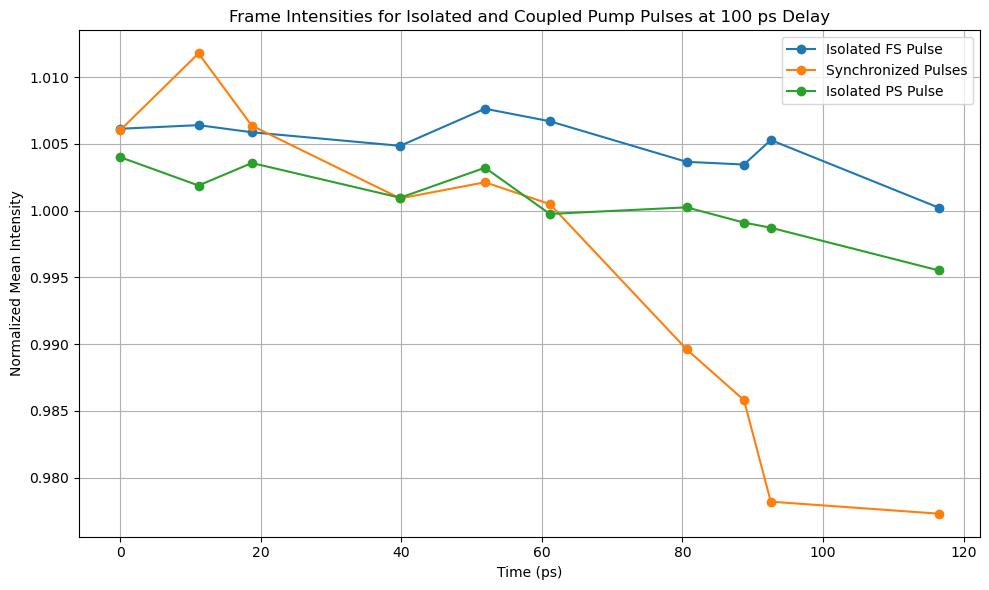

In [47]:
import numpy as np
import matplotlib.pyplot as plt

label_map = {
    'fs': 'Isolated FS Pulse',
    'ps': 'Isolated PS Pulse',
    'coupled': 'Synchronized Pulses'
}


def create_out_of_roi_mask(img_shape, rois):
    mask = np.ones(img_shape, dtype=bool)
    for (x1, y1, x2, y2) in rois:
        mask[y1:y2, x1:x2] = False
    return mask

# def normalize_image_outside_rois(img, rois, target_out_mean=1.0):
#     img = img.astype(np.float32)
#     mask = create_out_of_roi_mask(img.shape, rois)
#     out_pixels = img[mask]
#     out_mean = np.mean(out_pixels)
#     scale_factor = target_out_mean / out_mean
#     print(f"{filename} raw out-of-ROI mean: {out_mean:.2f}")
#     print(f"{filename} ROI means before normalization: {[np.mean(img[y1:y2, x1:x2]) for (x1,y1,x2,y2) in rois]}")
    
#     img_normalized = img * scale_factor
#     roi_means = compute_roi_means(img_normalized, rois)
#     print(f"{filename} ROI means after normalization: {roi_means}")
#     return np.clip(img_normalized, 0, 255)



def normalize_image_outside_rois(img, rois, filename=None, target_out_mean=1.0, 
                                  min_valid=10, max_valid=190, clip_percent=5):
    img = img.astype(np.float32)
    mask = create_out_of_roi_mask(img.shape, rois)
    out_pixels = img[mask]

    # Filter out pixels outside the valid intensity range
    valid_pixels = out_pixels[(out_pixels >= min_valid) & (out_pixels <= max_valid)]
    
    # Optional: exclude outliers using percentile clipping
    if len(valid_pixels) > 0:
        lower = np.percentile(valid_pixels, clip_percent)
        upper = np.percentile(valid_pixels, 100 - clip_percent)
        clipped_pixels = valid_pixels[(valid_pixels >= lower) & (valid_pixels <= upper)]
    else:
        clipped_pixels = valid_pixels  # fallback if no valid pixels
    
    # Compute scale factor from clipped mean
    out_mean = np.mean(clipped_pixels) if len(clipped_pixels) > 0 else 1.0
    scale_factor = target_out_mean / out_mean if out_mean > 0 else 1.0

    if filename:
        print(f"{filename} raw out-of-ROI mean (clipped): {out_mean:.2f}")
        print(f"{filename} ROI means before normalization: {[np.mean(img[y1:y2, x1:x2]) for (x1,y1,x2,y2) in rois]}")
    
    # Normalize and compute new ROI means
    img_normalized = img * scale_factor
    roi_means = compute_roi_means(img_normalized, rois)
    
    if filename:
        print(f"{filename} ROI means after normalization: {roi_means}")
    
    return np.clip(img_normalized, 0, 255)




def compute_roi_means(img, rois):
    roi_means = []
    for (x1, y1, x2, y2) in rois:
        roi = img[y1:y2, x1:x2]
        roi_means.append(np.mean(roi))
    return roi_means

# Target out-of-ROI mean intensity
target_intensity = 1.0

# Store normalized ROI means per image type
roi_data = {}
csv_rows = []

for label, filename in files_exp2.items():
    image_path = os.path.join(image_dir2, filename)
    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Couldn't read {filename}")
        continue
    

    img_norm = normalize_image_outside_rois(img, rois_2, target_out_mean = target_intensity)
    roi_means = compute_roi_means(img_norm, rois_2) # change img -> img_norm for normalized
    roi_data[label] = roi_means
    csv_rows.append([filename] + roi_means)

csv_output_path = os.path.join(image_dir2, 'normalized_roi_data.csv')

# Write header + data
with open(csv_output_path, 'w', newline='') as f:
    writer = csv.writer(f)
    header = ['Image'] + [f'ROI_{i+1}' for i in range(len(rois_2))]
    writer.writerow(header)
    writer.writerows(csv_rows)

print(f"✅ ROI data saved to {csv_output_path}")

# Plotting
plt.figure(figsize=(10, 6))
x = np.array(time_list[0:10]) * 1e12  # real time in ps
# xticks_uniform = np.arange(len(x))
# xtick_labels = [f"{t:.1f}" for t in x] 


for label, values in roi_data.items():
    plt.plot(x, values, marker='o', label = label_map.get(label, label))

plt.xlabel('Time (ps)')
plt.ylabel('Normalized Mean Intensity')
plt.title('Frame Intensities for Isolated and Coupled Pump Pulses at 100 ps Delay')
#plt.xticks(xticks_uniform, xtick_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Coupling_Intensity_exp2.png", dpi=300)
plt.show()











✅ ROI data saved to /home/c2eaefce-1e40-44c3-8824-0d44764c3b4c/ESEP/Water_Synchronized_Pump/exp3/normalized_roi_data.csv


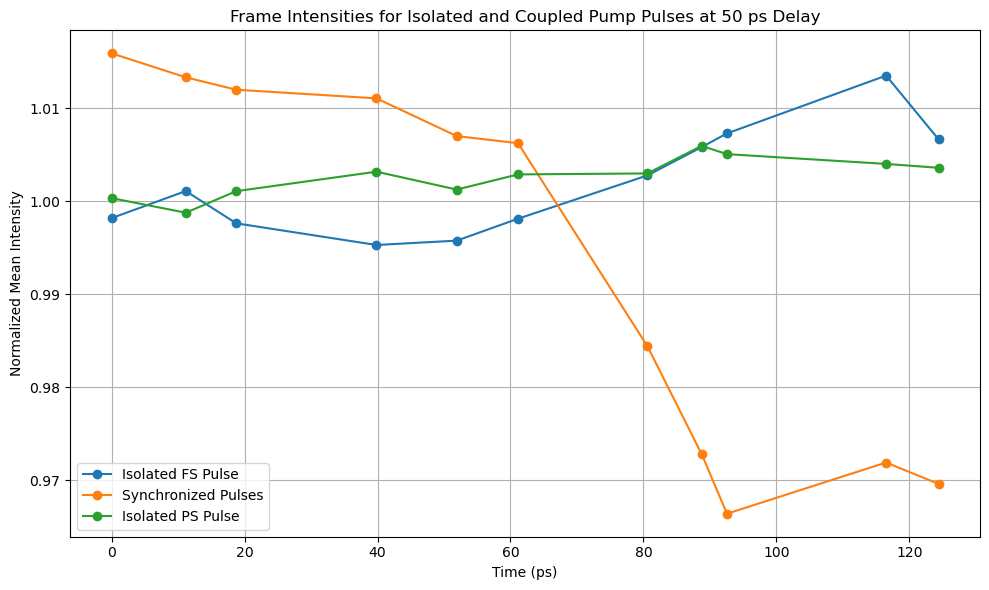

In [48]:
h = 18
w = 106

x1 = 25
y1 = 85


x2 = 190
y2 = 85
  

x3 = 360
y3 = 85
    

x4 = 527
y4 = 85


x5 = 696
y5 = 85


x6 = 30
y6 = 257
    

x7 = 190
y7 = 258
    

x8 = 360
y8 = 254


x9 = 531
y9 = 255
 
x10 = 699
y10 = 257

x11 = 19
y11 = 428


rois_3 = [
(x1, y1, x1 + w, y1 + h),        # ROI 1
(x2, y2, x2 + w, y2 + h),        # ROI 2
(x3, y3, x3 + w, y3 + h),        # ROI 3
(x4, y4, x4 + w, y4 + h),        # ROI 4
(x5, y5, x5 + w, y5 + h),        # ROI 5
(x6, y6, x6 + w, y6 + h),        # ROI 6
(x7, y7, x7 + w, y7 + h),        # ROI 7
(x8, y8, x8 + w, y8 + h),        # ROI 8
(x9, y9, x9 + w, y9 + h),        # ROI 9
(x10, y10, x10 + w, y10 + h),    # ROI 10
(x11, y11, x11 + w, y11 + h)     # ROI 11
]   


roi_data = {}
csv_rows = []

label_map_3_4 = {
    'fs': 'Isolated FS Pulse',
    'ps': 'Isolated PS Pulse',
    'coupled': 'Synchronized Pulses',
    'ps (raised energy)': 'Isolated PS Pulse with Higher Energy'
}


for label, filename in files_exp3.items():
    image_path = os.path.join(image_dir3, filename)
    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Couldn't read {filename}")
        continue
    

    img_norm = normalize_image_outside_rois(img, rois_3, target_out_mean = target_intensity)
    roi_means = compute_roi_means(img_norm, rois_3) # change img -> img_norm for normalized
    roi_data[label] = roi_means
    csv_rows.append([filename] + roi_means)

csv_output_path = os.path.join(image_dir3, 'normalized_roi_data.csv')

# Write header + data
with open(csv_output_path, 'w', newline='') as f:
    writer = csv.writer(f)
    header = ['Image'] + [f'ROI_{i+1}' for i in range(len(rois_3))]
    writer.writerow(header)
    writer.writerows(csv_rows)

print(f"✅ ROI data saved to {csv_output_path}")

# Plotting
plt.figure(figsize=(10, 6))

x = np.array(time_list[0:11]) * 1e12

for label, values in roi_data.items():
    plt.plot(x, values, marker='o', label=label_map.get(label, label))

plt.xlabel('Time (ps)')
plt.ylabel('Normalized Mean Intensity')
plt.title('Frame Intensities for Isolated and Coupled Pump Pulses at 50 ps Delay')
# plt.xticks(x)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Coupling_Intensity_exp3.png", dpi=300)
plt.show()


✅ ROI data saved to /home/c2eaefce-1e40-44c3-8824-0d44764c3b4c/ESEP/Water_Synchronized_Pump/exp3/normalized_roi_data_3_4.csv


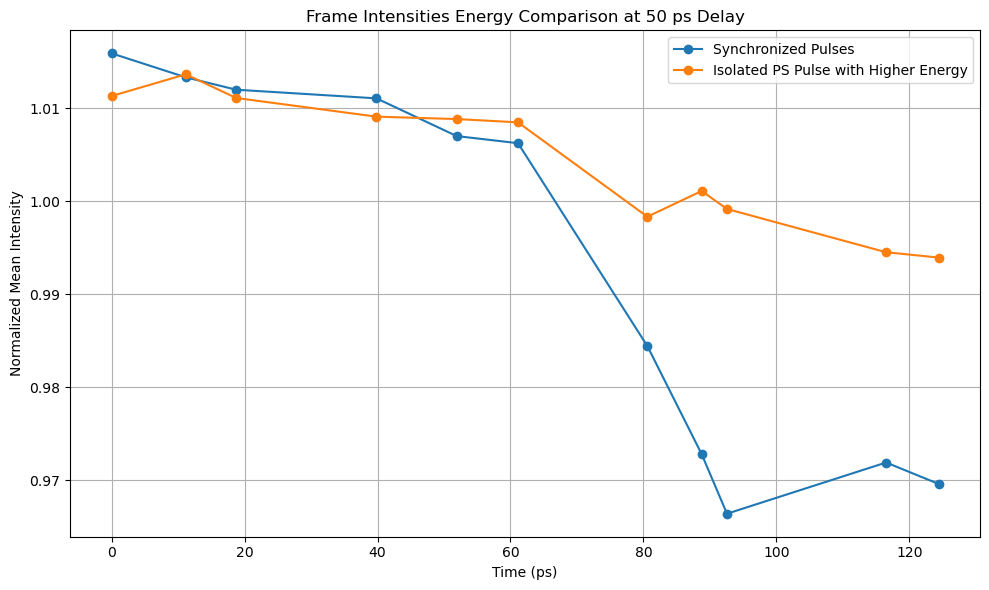

In [50]:
roi_data_3_4 = {}
csv_rows_3_4 = []

label_map_3_4 = {
    'coupled': 'Synchronized Pulses',
    'ps (raised energy)': 'Isolated PS Pulse with Higher Energy'
}

files_exp3_4 = {'coupled': 'exp3coupled.jpeg', 'ps (raised energy)': 'exp4ps.jpeg'}

for label, filename in files_exp3_4.items():
    image_path = os.path.join(image_dir3, filename)
    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Couldn't read {filename}")
        continue
    

    img_norm = normalize_image_outside_rois(img, rois_3, target_out_mean = target_intensity)
    roi_means_3_4 = compute_roi_means(img_norm, rois_3)
    roi_data_3_4[label] = roi_means_3_4
    csv_rows_3_4.append([filename] + roi_means_3_4)

image_dir3 = '/home/c2eaefce-1e40-44c3-8824-0d44764c3b4c/ESEP/Water_Synchronized_Pump/exp3'
csv_output_path = os.path.join(image_dir3, 'normalized_roi_data_3_4.csv')

# Write header + data
with open(csv_output_path, 'w', newline='') as f:
    writer = csv.writer(f)
    header = ['Image'] + [f'ROI_{i+1}' for i in range(len(rois_3))]
    writer.writerow(header)
    writer.writerows(csv_rows_3_4)

print(f"✅ ROI data saved to {csv_output_path}")

# Plotting
plt.figure(figsize=(10, 6))

x = np.array(time_list[0:11]) * 1e12

for label, values in roi_data_3_4.items():
    plt.plot(x, values, marker='o', label = label_map_3_4.get(label, label))

plt.xlabel('Time (ps)')
plt.ylabel('Normalized Mean Intensity')
plt.title('Frame Intensities Energy Comparison at 50 ps Delay')
# plt.xticks(x)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Coupling_Intensity_exp3_4.png", dpi=300)
plt.show()